<a href="https://colab.research.google.com/github/Seo-Hongju/Hong_test_git01/blob/master/DecisionTree2_lec_%EC%84%9C%ED%99%8D%EC%A3%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# 임포트하기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
# 파일 가져오기
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [0]:
import os
path = '/gdrive/My Drive/Colab Notebooks/'
os.chdir(path)
os.getcwd()

'/gdrive/My Drive/Colab Notebooks'

### df에 데이터 저장

In [0]:
df = pd.read_csv('loan_data.csv')
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [0]:
# 데이터 타입 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [0]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [0]:
y = df['not.fully.paid']
x = df.drop('not.fully.paid', axis=1)

In [0]:
x = pd.get_dummies(x, drop_first=True)

In [0]:
# 데이터 나누기
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,\
                                                    random_state=77)

In [0]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()

In [0]:
# 전처리 작업
tree.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
# 예측치 저장
predictions = tree.predict(x_test)
predictions

array([0, 0, 0, ..., 0, 1, 0])

In [0]:
# 평가 결과 확인
# 정확도(Accuracy) : 양성에 근접한 정도
# 정밀도(precision) : 양성의 분포된 정도
# 재현율(Recall) : 양성 중 정확히 양성이라고 식별된 비율
# F1 Score : 정밀도와 재현율을 모두 사용한 측정항목
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      2451
           1       0.20      0.22      0.21       423

    accuracy                           0.75      2874
   macro avg       0.53      0.53      0.53      2874
weighted avg       0.76      0.75      0.76      2874



In [0]:
result = dict()

tree.fit(x_train, y_train)
result['Tree'] = tree.score(x_test, y_test)

Tree    0.752610
knn     0.828810
nb      0.829854
gbc     0.849339
xgb     0.849687
lr      0.851775
rf      0.851775
svc     0.852818
dtype: float64


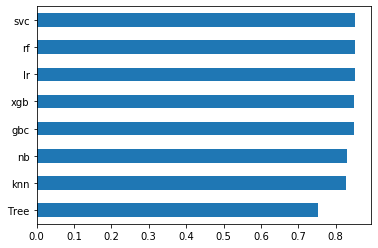

In [0]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)
result['nb'] = nb.score(x_test, y_test)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
result['knn'] = knn.score(x_test, y_test)

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)
result['lr'] = lr.score(x_test, y_test)

from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, y_train)
result['svc'] = svc.score(x_test, y_test)

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=0)
rf.fit(x_train, y_train)
result['rf'] = rf.score(x_test, y_test)

from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state=0)
gbc.fit(x_train, y_train)
result['gbc'] = gbc.score(x_test, y_test)

from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=0)
xgb.fit(x_train, y_train)
result['xgb'] = xgb.score(x_test, y_test)

se1 = pd.Series(result).sort_values()
print(se1)
se1.plot(kind='barh')

In [0]:
# 다른 모델 확인 결과 85%가 최대치로 보임